In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

##  Representation Learning in Neural Networks 

In neural network, we don't need to preprocess the data to add non-linear features, since the MLP will learn the best non-linear transformations to the input in order to achieve the best classification. In a classification task, the output of hidden layers could be interpreted as:

> ***Outputs of each hidden layer of an MLP is a non-linear transformation of the input data into a feature space. Each hidden layer should transform the input so that it is more linearly separable.***

***Note:*** You will see later during the semester that often times, we are more interested in learning the latent representation of the data rather than perfecting our performance in a single task (such as classification). 

In [29]:
# generate a toy classification data set with non-linear decision boundary
random_seed = 1
X, Y = make_moons(noise=0.05, random_state=random_seed, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

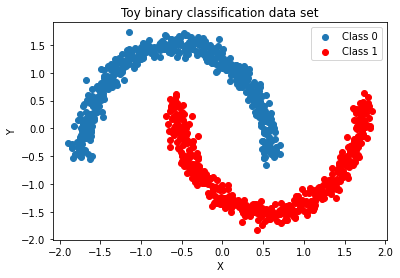

In [30]:
# scatter plot the data, color each class differently
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set')
plt.show()

In [31]:
# fit a logistic regression model to classify this data set as a benchmark 
simple_model = LogisticRegression()
simple_model.fit(X_train, Y_train)
print('Train accuracy:', simple_model.score(X_train, Y_train))
print('Test accuracy:', simple_model.score(X_test, Y_test))

Train accuracy: 0.8942857142857142
Test accuracy: 0.8733333333333333


Now fix a width $H = 2$ (so that we can scatter plot the latent representations of our data at each layer) and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 


In [32]:
# fix a width that is suited for visualizing the output of hidden layers
H = 2
input_dim = X.shape[1]

# create sequential multi-layer perceptron
model = Sequential()

# Then, use add() to insert layers into the container
model.add(Input(shape=(input_dim,)))
model.add(Dense(H,activation='tanh'))
model.add(Dense(H, activation='tanh'))
model.add(Dense(H, activation='tanh'))
#binary classification, one output
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              metrics=['acc'])

In [42]:
model.layers

In [33]:
# fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, verbose=0)

In [34]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0007340409210883081
Train accuracy: 1.0


In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0008793871384114027
Test accuracy: 1.0


In [36]:
# get the class probabilities predicted by our MLP on the training set
Y_train_pred = model.predict(X_train)

In [43]:
model.layers

In [44]:
get_1st_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[0].output])
layer_output = get_1st_layer_output([X_train])[0]

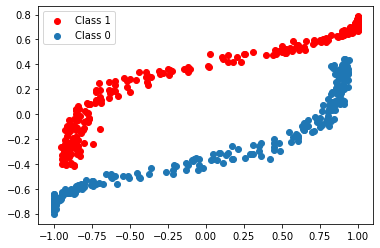

In [45]:
# plot the latent representation of our training data at the first hidden layer
Y_train_pred = Y_train_pred.reshape((Y_train_pred.shape[0], ))

fig, ax = plt.subplots()
ax.scatter(layer_output[Y_train_pred >= 0.5, 0], layer_output[Y_train_pred >= 0.5, 1], color='r', label='Class 1')
ax.scatter(layer_output[Y_train_pred < 0.5, 0], layer_output[Y_train_pred < 0.5, 1], label='Class 0')
ax.legend()
plt.show()

In [46]:
get_2nd_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_2nd_layer_output([X_train])[0]

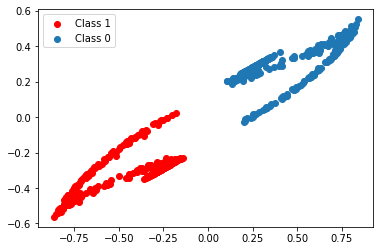

In [47]:
# plot the latent representation of our training data at the second hidden layer
Y_train_pred = Y_train_pred.reshape((Y_train_pred.shape[0], ))

fig, ax = plt.subplots()
ax.scatter(layer_output[Y_train_pred >= 0.5, 0], layer_output[Y_train_pred >= 0.5, 1], color='r', label='Class 1')
ax.scatter(layer_output[Y_train_pred < 0.5, 0], layer_output[Y_train_pred < 0.5, 1], label='Class 0')
ax.legend()
plt.show()

In [48]:
get_3rd_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_3rd_layer_output([X_train])[0]

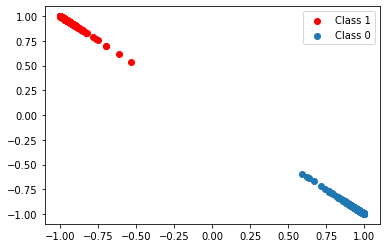

In [49]:
# plot the latent representation of our training data at the third hidden layer
Y_train_pred = Y_train_pred.reshape((Y_train_pred.shape[0], ))

fig, ax = plt.subplots()
ax.scatter(layer_output[Y_train_pred >= 0.5, 0], layer_output[Y_train_pred >= 0.5, 1], color='r', label='Class 1')
ax.scatter(layer_output[Y_train_pred < 0.5, 0], layer_output[Y_train_pred < 0.5, 1], label='Class 0')
ax.legend()
plt.show()

What if we only use linear activations in those hidden layers? 